<img src='images/adv_stats_prob.png'>

<img src='images/adv_stats_obj.png'>

<img src='images/adv_stats_data_describ.png'>

<img src='images/adv_stats_steps.png'>

In [1]:
!pip install yfinance

  Using cached yfinance-0.2.26-py2.py3-none-any.whl (62 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 21.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Using cached frozendict-2.3.8-cp310-cp310-macosx_11_0_arm64.whl (35 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 5.5 MB/s eta 0:00:00
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl (11 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.9/123.9 kB 5.2 MB/s eta 0:00:00
  Using cached idna-3.4-py3-none-any.whl (61 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 kB 5.0 MB/s eta 0:00:00
  DEPRECATION: lxml is being installed using the legacy 'setup.py i

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import yfinance as yahooFinance

In [3]:
google=yahooFinance.Ticker('GOOG')

In [4]:
# 5 years of data
df=google.history('5Y')

In [5]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-07-26 00:00:00-04:00,62.549999,63.488548,62.451000,63.416500,48112000,0.0,0.0
2018-07-27 00:00:00-04:00,63.549999,63.694500,61.549999,61.924999,42612000,0.0,0.0
2018-07-30 00:00:00-04:00,61.400501,61.745800,60.573502,60.987000,36998000,0.0,0.0
2018-07-31 00:00:00-04:00,61.000500,61.379398,60.279999,60.862999,32894000,0.0,0.0
2018-08-01 00:00:00-04:00,61.400002,61.673500,60.510502,61.000500,31344000,0.0,0.0


In [6]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-07-19 00:00:00-04:00,124.790001,125.470001,122.470001,122.779999,22313800,0.0,0.0
2023-07-20 00:00:00-04:00,122.120003,124.699997,118.684998,119.529999,27541700,0.0,0.0
2023-07-21 00:00:00-04:00,120.870003,121.300003,119.070000,120.309998,56498100,0.0,0.0
2023-07-24 00:00:00-04:00,121.926003,123.349998,121.379997,121.879997,22276100,0.0,0.0
2023-07-25 00:00:00-04:00,121.879997,123.690002,121.529999,122.790001,31252200,0.0,0.0


In [7]:
df.shape

(1257, 7)

In [8]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.0,1257.000000
mean,91.833793,92.912392,90.852523,91.897754,3.029793e+07,0.0,0.015911
std,30.094363,30.398323,29.777215,30.077089,1.314900e+07,0.0,0.564108
min,48.695000,50.176998,48.505501,48.811001,6.936000e+06,0.0,0.000000
25%,61.959000,62.415001,61.411499,61.956001,2.193000e+07,0.0,0.000000
50%,89.160004,90.129997,88.000999,89.088501,2.706000e+07,0.0,0.000000
75%,116.830002,118.637497,115.692001,117.229500,3.417930e+07,0.0,0.000000
max,151.863495,152.100006,149.887497,150.709000,1.241400e+08,0.0,20.000000


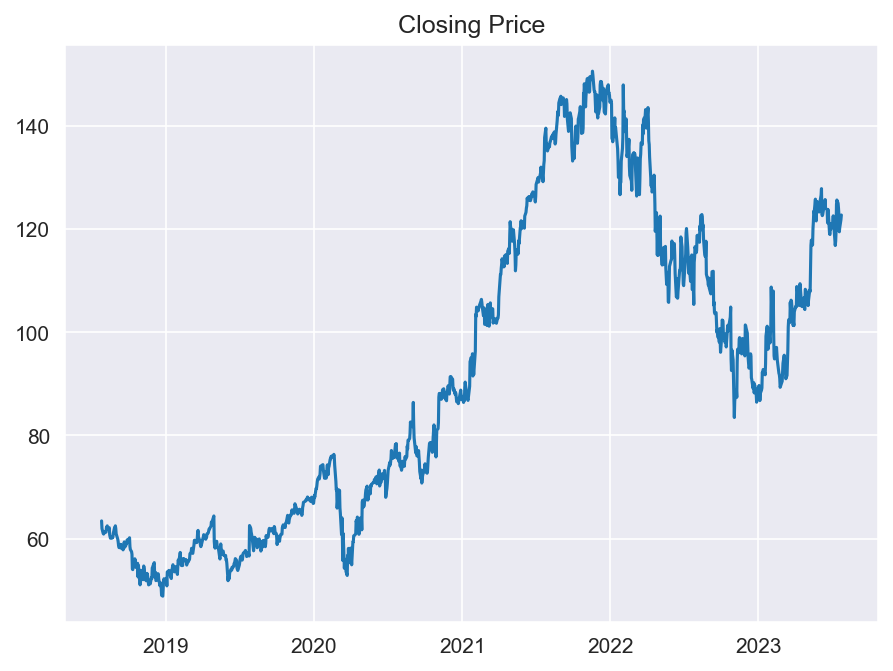

In [9]:
#overview of closing price before calculating DMAs
sns.set_style('darkgrid')
plt.figure(figsize=(7,5),dpi=150)
plt.title('Closing Price')
plt.plot(df['Close'])

In [10]:
# Calculate 50 DMA
df['fiftyDMA']=df['Close'].rolling(50).mean()

In [11]:
# Calculate 200 DMA
df['thDMA']=df['Close'].rolling(200).mean()

In [12]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,fiftyDMA,thDMA
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1257.0,1257.000000,1208.000000,1058.000000
mean,91.833793,92.912392,90.852523,91.897754,3.029793e+07,0.0,0.015911,91.912006,93.501457
std,30.094363,30.398323,29.777215,30.077089,1.314900e+07,0.0,0.564108,29.672632,28.361345
min,48.695000,50.176998,48.505501,48.811001,6.936000e+06,0.0,0.000000,52.442220,55.768365
25%,61.959000,62.415001,61.411499,61.956001,2.193000e+07,0.0,0.000000,62.515879,65.015657
50%,89.160004,90.129997,88.000999,89.088501,2.706000e+07,0.0,0.000000,93.108100,96.968950
75%,116.830002,118.637497,115.692001,117.229500,3.417930e+07,0.0,0.000000,114.983738,118.906473
max,151.863495,152.100006,149.887497,150.709000,1.241400e+08,0.0,20.000000,146.183850,139.273730


In [13]:
df.drop(columns=['Dividends','Stock Splits'],inplace=True)

In [14]:
df.head()

,Open,High,Low,Close,Volume,fiftyDMA,thDMA
Date,,,,,,,
2018-07-26 00:00:00-04:00,62.549999,63.488548,62.451000,63.416500,48112000,NaN,NaN
2018-07-27 00:00:00-04:00,63.549999,63.694500,61.549999,61.924999,42612000,NaN,NaN
2018-07-30 00:00:00-04:00,61.400501,61.745800,60.573502,60.987000,36998000,NaN,NaN
2018-07-31 00:00:00-04:00,61.000500,61.379398,60.279999,60.862999,32894000,NaN,NaN
2018-08-01 00:00:00-04:00,61.400002,61.673500,60.510502,61.000500,31344000,NaN,NaN


In [15]:
df.tail()

,Open,High,Low,Close,Volume,fiftyDMA,thDMA
Date,,,,,,,
2023-07-19 00:00:00-04:00,124.790001,125.470001,122.470001,122.779999,22313800,121.7174,103.664625
2023-07-20 00:00:00-04:00,122.120003,124.699997,118.684998,119.529999,27541700,121.9432,103.781525
2023-07-21 00:00:00-04:00,120.870003,121.300003,119.070000,120.309998,56498100,122.1906,103.886575
2023-07-24 00:00:00-04:00,121.926003,123.349998,121.379997,121.879997,22276100,122.3826,103.983925
2023-07-25 00:00:00-04:00,121.879997,123.690002,121.529999,122.790001,31252200,122.5004,104.086775


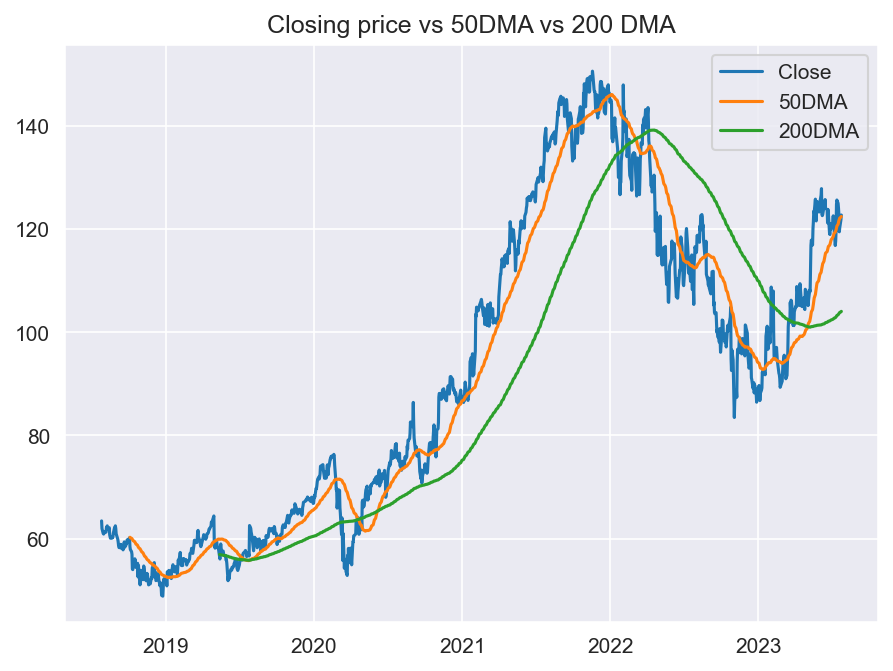

In [16]:
# plot closing price vs 50 DMA vs 200 DMA
sns.set_style('darkgrid')
plt.figure(figsize=(7,5),dpi=150)
plt.title('Closing price vs 50DMA vs 200 DMA')
plt.plot(df['Close'],label='Close')
plt.plot(df['fiftyDMA'],label='50DMA')
plt.plot(df['thDMA'],label='200DMA')
plt.legend()

## Inferences from the above graph
1. 50DMA and 200DMA are fairly good indicators of how the stock is moving
2. If the closing price is above the 50DMA or 200DMA, it is usually on the untrend or bullish.
3. If the closing price is below the 50DMA or 200DMA, it usually means that it is in a downd trend.
4. Every point where the 50DMA and 200DMA intersect, the market usually reverses its trend (high-> low | low-> high)
5. The huge dip at the MArch 2020, indicates the COVID 19 market crash

<Axes: >

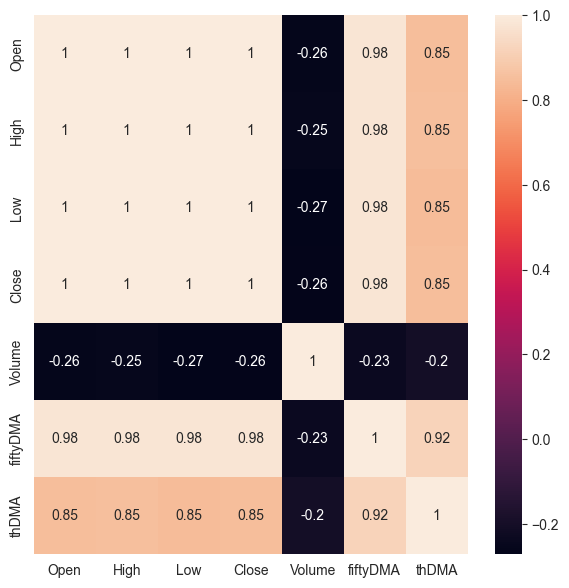

In [17]:
# Analyse correlation between each variables
plt.figure(figsize=(7,7),dpi=100)
sns.heatmap(df.corr(),annot=True)

## Inferences from the heatmap

1. Closing price has very High correlation with almost all the variables except the volume
2. There is strong multi collinearity between the variables as well

<Axes: title={'center': 'Distplot 50 DMA'}, xlabel='fiftyDMA', ylabel='Density'>

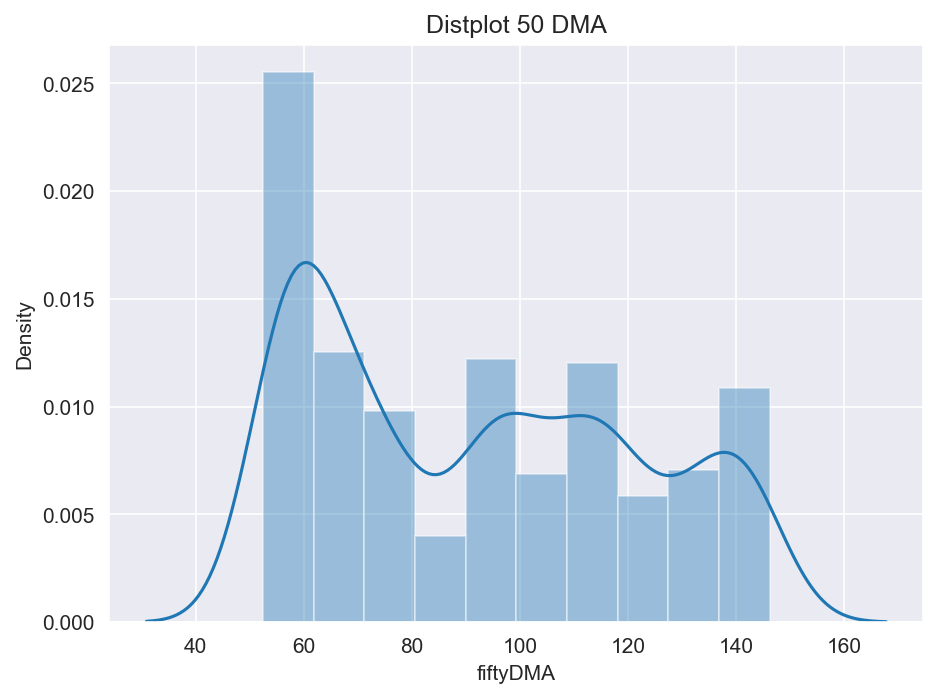

In [18]:
# plot displot of 50DMA
sns.set_style('darkgrid')
plt.figure(figsize=(7,5),dpi=150)
plt.title('Distplot 50 DMA')
sns.distplot(df['fiftyDMA'])


<Axes: title={'center': 'Distplot of close price'}, xlabel='Close', ylabel='Density'>

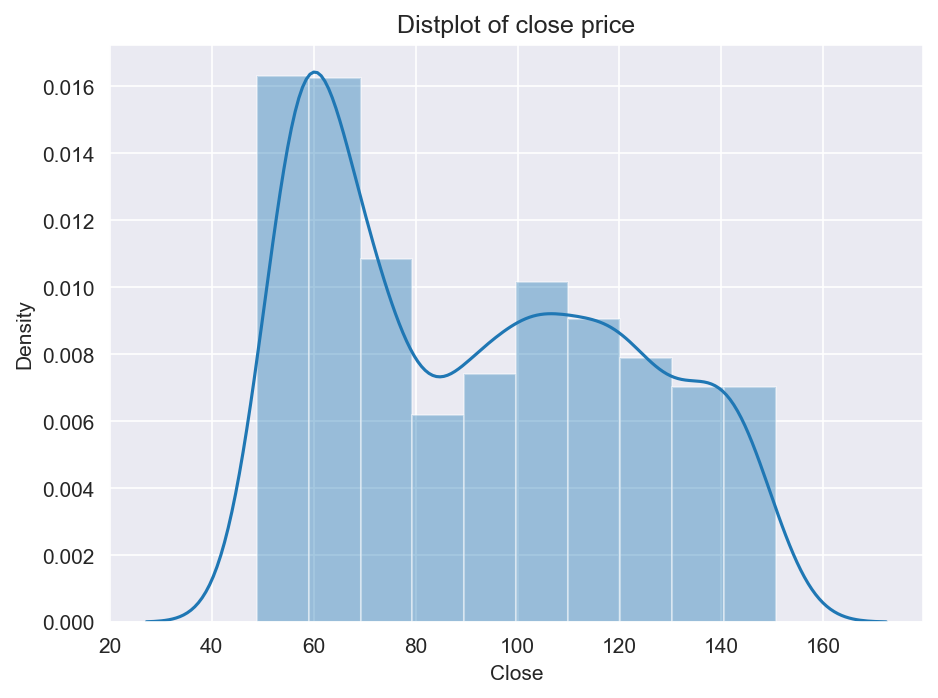

In [19]:
# plot displot of the close price
sns.set_style('darkgrid')
plt.figure(figsize=(7,5),dpi=150)
plt.title('Distplot of close price')
sns.distplot(df['Close'])

They seem to have same distribution

In [20]:
import statsmodels.formula.api as smf
model=smf.ols(formula='Close ~ fiftyDMA', data=df)
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                 2.584e+04
Date:                Wed, 26 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:01:53   Log-Likelihood:                -3943.0
No. Observations:                1208   AIC:                             7890.
Df Residuals:                    1206   BIC:                             7900.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3983      0.593      4.041      0.000       1.234       3.563
fiftyDMA       0.9877      0.006    160.745      0.000       0.976       1.000
==============================================================================
Omnibus:                       51.983   Durbin-Watson:                   0.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.157
Skew:                          -0.504   Prob(JB):                     2.35e-13
Kurtosis:                       3.373   Cond. No.                         315.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Inferences from the Summary

1. Good r2 scores and coef
2. Since they are very highly correlated, ~ 1, it isnt wise to fit the model based on the parameters in real life